# **Create visualizations using Matplotib, Seaborn and Folium** 

# Setup

For this project, I will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


# Importing Data

In [21]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

### Analysis of Yearly Fluctuations in Automobile Sales Using a *Line Chart*

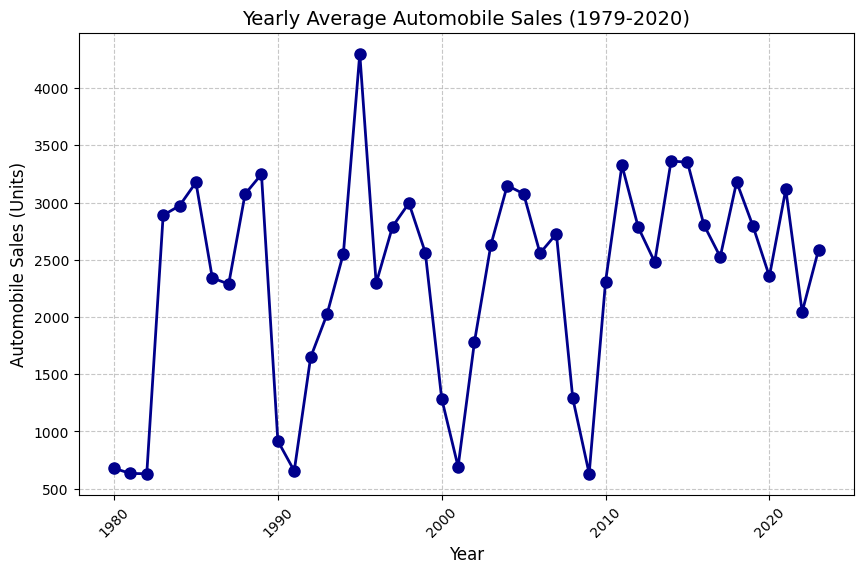

In [7]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', 
                  color='darkblue', 
                  linewidth=2, 
                  marker='o',
                  markersize=8)

plt.title('Yearly Average Automobile Sales (1979-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Automobile Sales (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

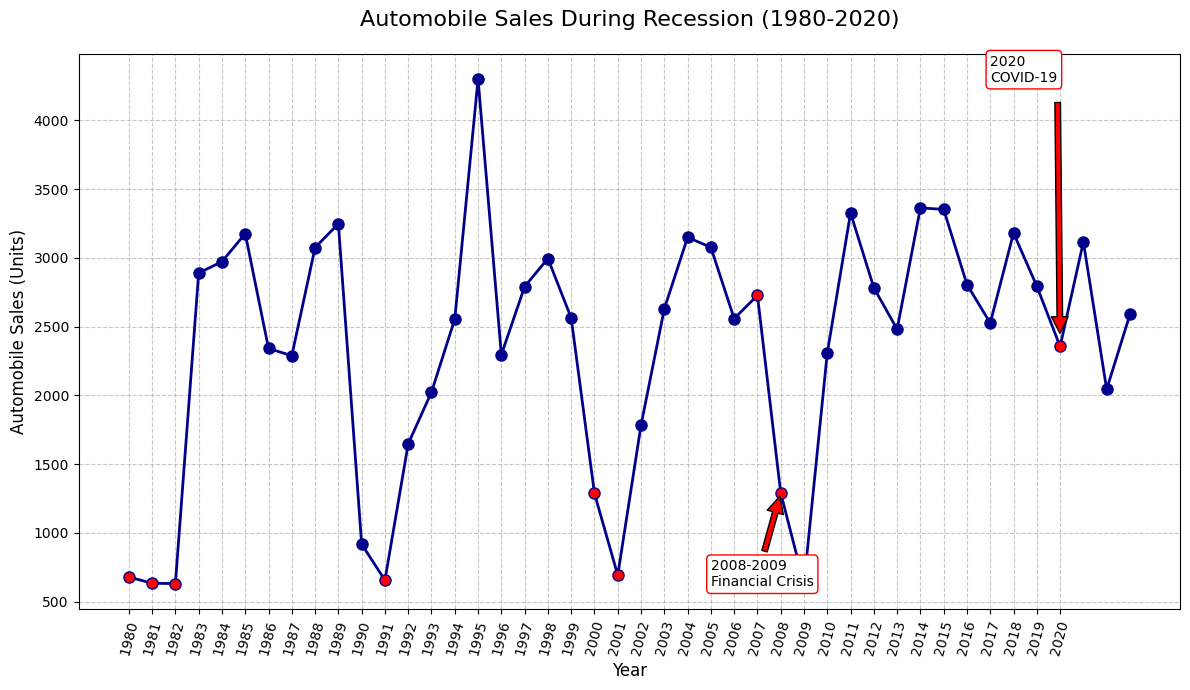

In [9]:
yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()
plt.figure(figsize=(12, 7))
yearly_sales.plot(kind='line', 
                  color='darkblue', 
                  linewidth=2, 
                  marker='o',
                  markersize=8)
plt.title('Automobile Sales During Recession (1980-2020)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Automobile Sales (Units)', fontsize=12)
all_years = range(1980, 2021)
plt.xticks(all_years, rotation=75)
plt.annotate('2008-2009\nFinancial Crisis', 
             xy=(2008, yearly_sales.loc[2008]), 
             xytext=(2005, yearly_sales.min()-20), 
             arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle="round", fc="white", ec="red"))
plt.annotate('2020\nCOVID-19', 
             xy=(2020, yearly_sales.loc[2020]), 
             xytext=(2017, yearly_sales.max()-20), 
             arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle="round", fc="white", ec="red"))
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
for year in recession_years:
    if year in yearly_sales.index:
        plt.plot(year, yearly_sales.loc[year], 'ro')  # Red marker for recession years
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('automobile_sales_during_recession.png', dpi=300, bbox_inches='tight')
plt.show()

####  Sales Trend Analysis of Different Vehicle Types During Recession Periods

<Figure size 1200x700 with 0 Axes>

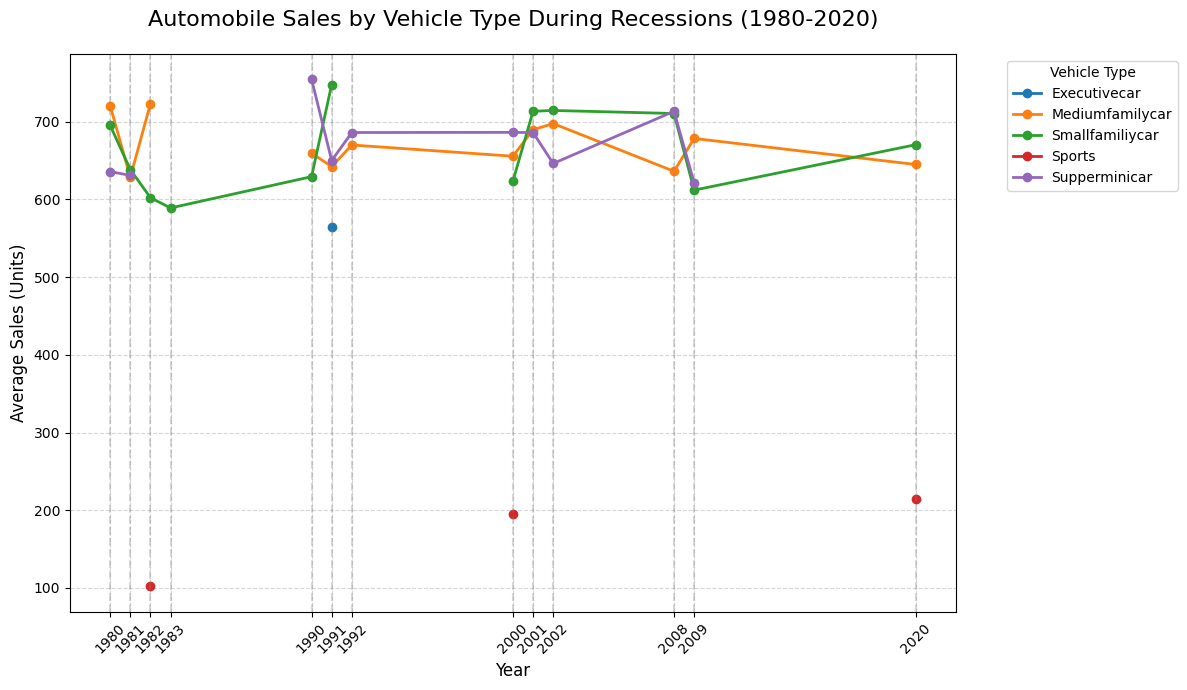

In [10]:
recession_df = df[df['Recession'] == 1]
vehicle_sales = recession_df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
pivot_sales = vehicle_sales.pivot(index='Year', columns='Vehicle_Type', values='Automobile_Sales')
plt.figure(figsize=(12, 7))
pivot_sales.plot(kind='line', 
                linewidth=2,
                marker='o',
                markersize=6,
                figsize=(12, 7))
plt.title('Automobile Sales by Vehicle Type During Recessions (1980-2020)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sales (Units)', fontsize=12)
plt.xticks(pivot_sales.index, rotation=45)
# Highlight recession years
for year in pivot_sales.index:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('sales_by_vehicle_during_recession.png', dpi=300, bbox_inches='tight')
plt.show()

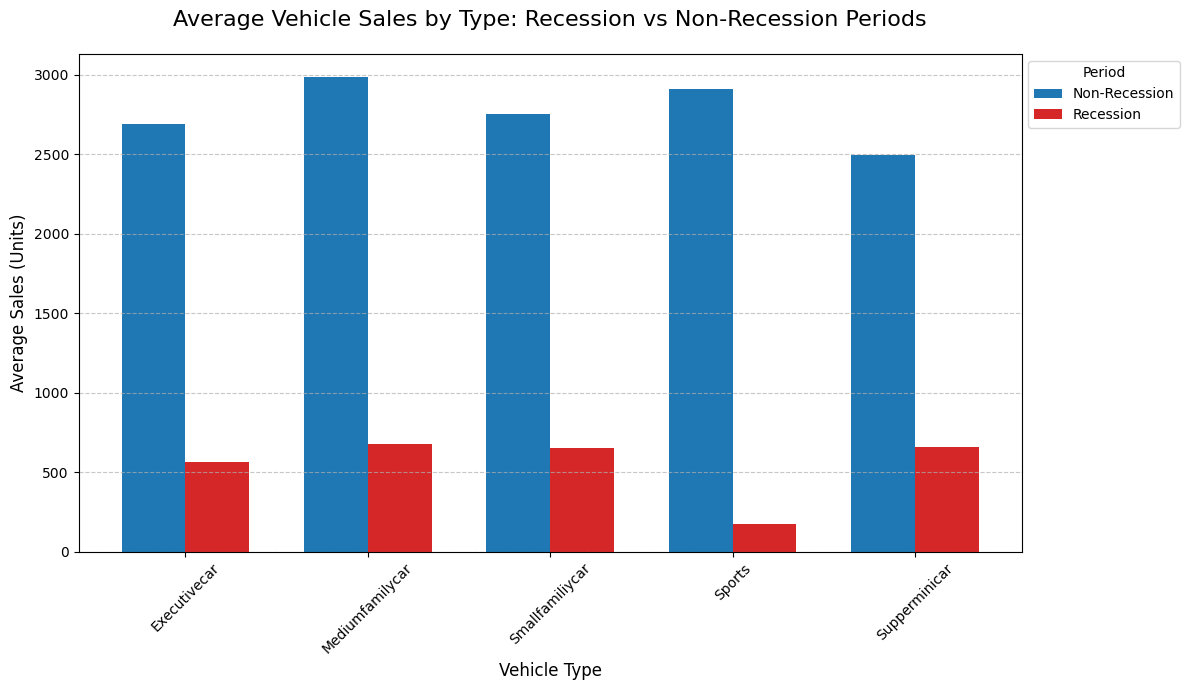

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
sales_comparison = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().unstack(level='Recession')
sales_comparison.columns = ['Non-Recession', 'Recession']

plt.figure(figsize=(12, 7))
x = range(len(sales_comparison))
width = 0.35
rects1 = plt.bar([i - width/2 for i in x], sales_comparison['Non-Recession'], width, 
                label='Non-Recession', color='#1f77b4')
rects2 = plt.bar([i + width/2 for i in x], sales_comparison['Recession'], width, 
                label='Recession', color='#d62728')

plt.title('Average Vehicle Sales by Type: Recession vs Non-Recession Periods', fontsize=16, pad=20)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Average Sales (Units)', fontsize=12)
plt.xticks(x, sales_comparison.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Period', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig('sales_comparison_recession_vs_normal.png', dpi=300, bbox_inches='tight')
plt.show()

### Comparing Sales Trends by Vehicle Type Using Seaborn During Recession and Non-Recession Periods

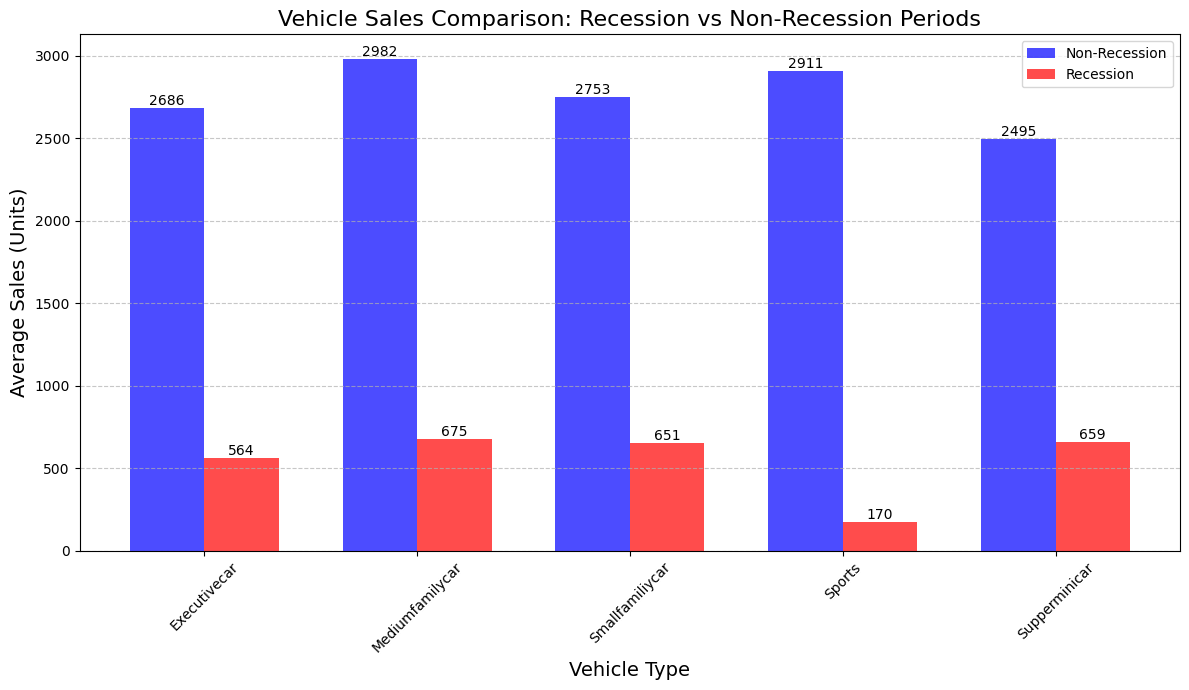

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
sales_comparison = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
pivot_sales = sales_comparison.pivot(index='Vehicle_Type', columns='Recession', values='Automobile_Sales')
pivot_sales.columns = ['Non-Recession', 'Recession']  # Rename columns for clarity
plt.figure(figsize=(12, 7))

x = range(len(pivot_sales))
width = 0.35

non_rec_bars = plt.bar([i - width/2 for i in x], pivot_sales['Non-Recession'], 
                      width, label='Non-Recession', color='blue', alpha=0.7)
rec_bars = plt.bar([i + width/2 for i in x], pivot_sales['Recession'], 
                 width, label='Recession', color='red', alpha=0.7)

plt.title('Vehicle Sales Comparison: Recession vs Non-Recession Periods', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Average Sales (Units)', fontsize=14)
plt.xticks(x, pivot_sales.index, rotation=45)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom')

add_labels(non_rec_bars)
add_labels(rec_bars)

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('vehicle_sales_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### Comparative Analysis of GDP Trends During Recession and Non-Recession Periods Using Line Plots

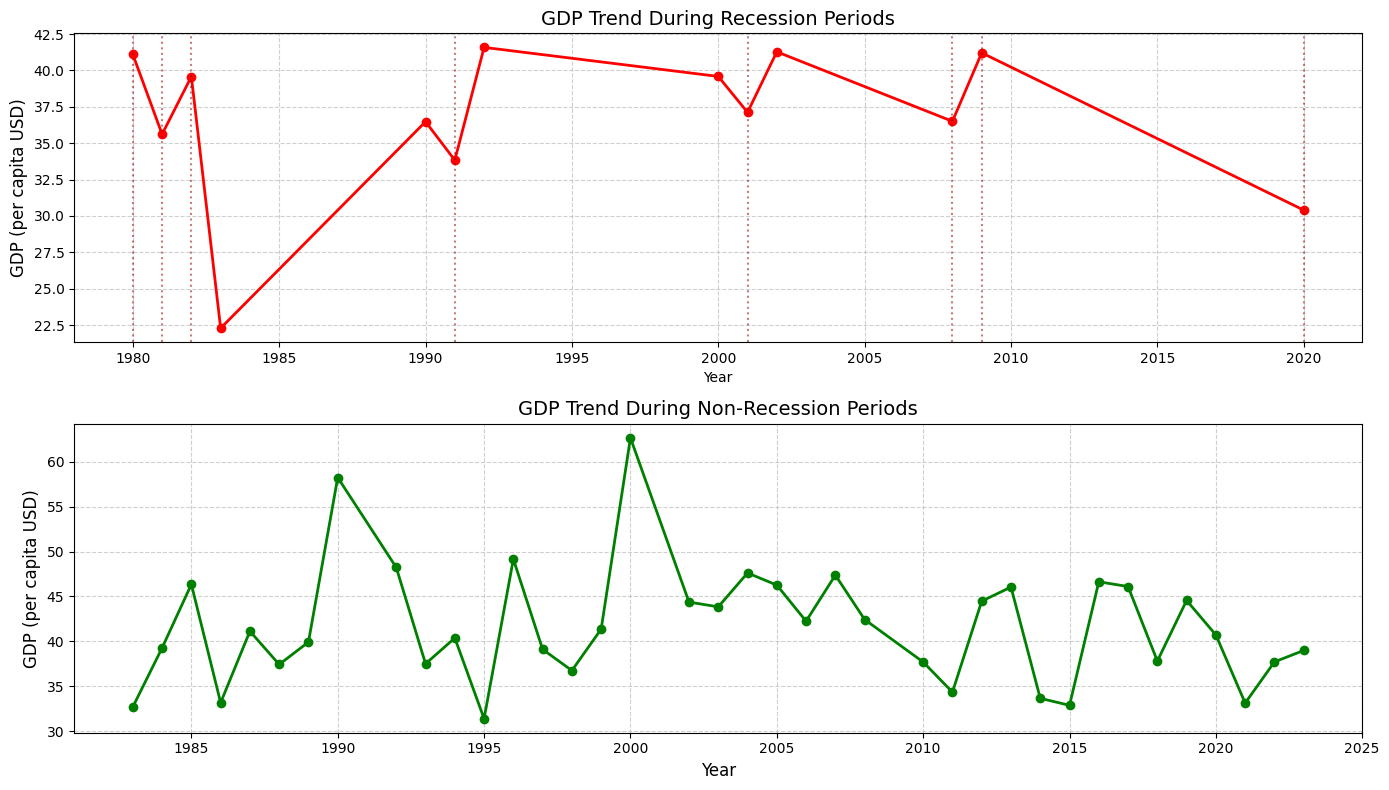

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(2, 1, 1)  # 2 rows, 1 column, position 1
recession_data = df[df['Recession'] == 1]
recession_data.groupby('Year')['GDP'].mean().plot(
    ax=ax1,
    color='red',
    linewidth=2,
    marker='o',
    markersize=6
)
ax1.set_title('GDP Trend During Recession Periods', fontsize=14)
ax1.set_ylabel('GDP (per capita USD)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

for year in [1980, 1981, 1982, 1991, 2001, 2008, 2009, 2020]:
    if year in recession_data['Year'].values:
        ax1.axvline(x=year, color='darkred', linestyle=':', alpha=0.5)

ax2 = fig.add_subplot(2, 1, 2)  # 2 rows, 1 column, position 2
non_recession_data = df[df['Recession'] == 0]
non_recession_data.groupby('Year')['GDP'].mean().plot(
    ax=ax2,
    color='green',
    linewidth=2,
    marker='o',
    markersize=6
)
ax2.set_title('GDP Trend During Non-Recession Periods', fontsize=14)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('GDP (per capita USD)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('gdp_comparison_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

### Bubble Plot Visualization of Seasonality Impact on Automobile Sales

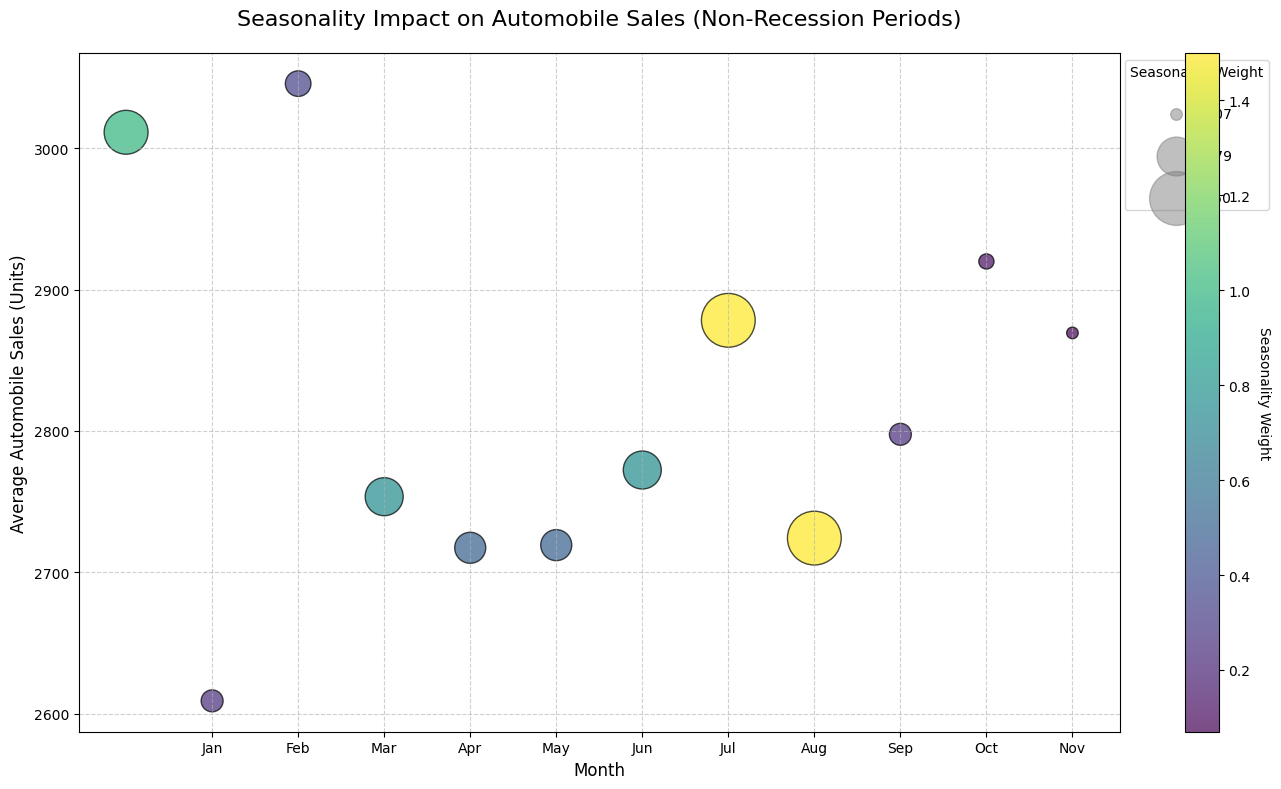

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

non_recession_data = df[df['Recession'] == 0]

monthly_data = non_recession_data.groupby('Month').agg({
    'Automobile_Sales': 'mean',
    'Seasonality_Weight': 'mean'
}).reset_index()

plt.figure(figsize=(14, 8))
plt.scatter(
    x=monthly_data['Month'],
    y=monthly_data['Automobile_Sales'],
    s=monthly_data['Seasonality_Weight']*1000,  # Scale bubble sizes for visibility
    alpha=0.7,
    edgecolors='black',
    linewidth=1,
    c=monthly_data['Seasonality_Weight'],
    cmap='viridis'
)

plt.title('Seasonality Impact on Automobile Sales (Non-Recession Periods)', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Automobile Sales (Units)', fontsize=12)
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

cbar = plt.colorbar()
cbar.set_label('Seasonality Weight', rotation=270, labelpad=15)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

min_weight = monthly_data['Seasonality_Weight'].min()
max_weight = monthly_data['Seasonality_Weight'].max()
mid_weight = (min_weight + max_weight)/2

for weight in [min_weight, mid_weight, max_weight]:
    plt.scatter([], [], s=weight*1000, c='gray', alpha=0.5, 
               label=f'{weight:.2f}')
plt.legend(title='Seasonality Weight', bbox_to_anchor=(1.15, 1), labelspacing=2)

plt.savefig('seasonality_impact.png', dpi=300, bbox_inches='tight')
plt.show()

### Analyzing the Correlation Between Average Vehicle Price and Sales Volume During Recessions Using Matplotlib Scatter Plots

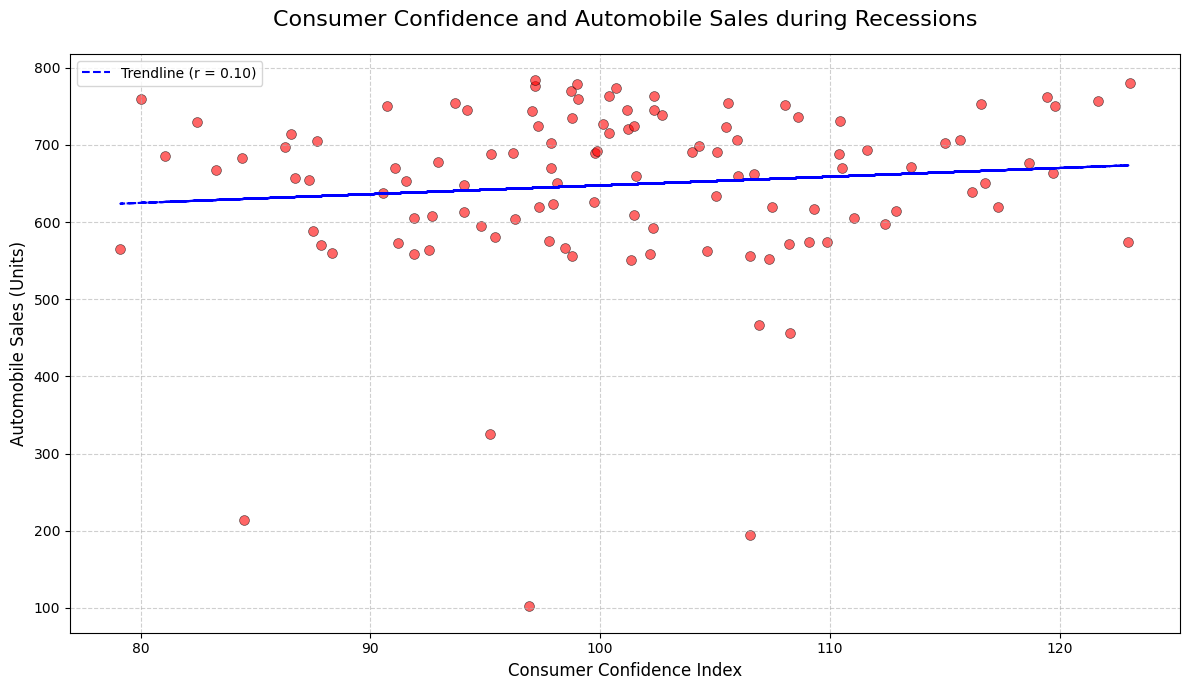

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

recession_data = df[df['Recession'] == 1]

plt.figure(figsize=(12, 7))
plt.scatter(
    x=recession_data['Consumer_Confidence'],
    y=recession_data['Automobile_Sales'],
    s=50,  # Fixed bubble size
    alpha=0.6,
    c='red',  # Color for recession points
    edgecolors='black',
    linewidth=0.5
)

plt.title('Consumer Confidence and Automobile Sales during Recessions', fontsize=16, pad=20)
plt.xlabel('Consumer Confidence Index', fontsize=12)
plt.ylabel('Automobile Sales (Units)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

z = np.polyfit(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'], 1)
p = np.poly1d(z)
plt.plot(recession_data['Consumer_Confidence'], 
         p(recession_data['Consumer_Confidence']), 
         "b--", 
         linewidth=1.5,
         label=f'Trendline (r = {np.corrcoef(recession_data["Consumer_Confidence"], recession_data["Automobile_Sales"])[0,1]:.2f})')

plt.legend()
plt.tight_layout()

plt.savefig('consumer_confidence_vs_sales_recession.png', dpi=300, bbox_inches='tight')
plt.show()

### Relationship between Average Vehicle Price and Sales during Recessions

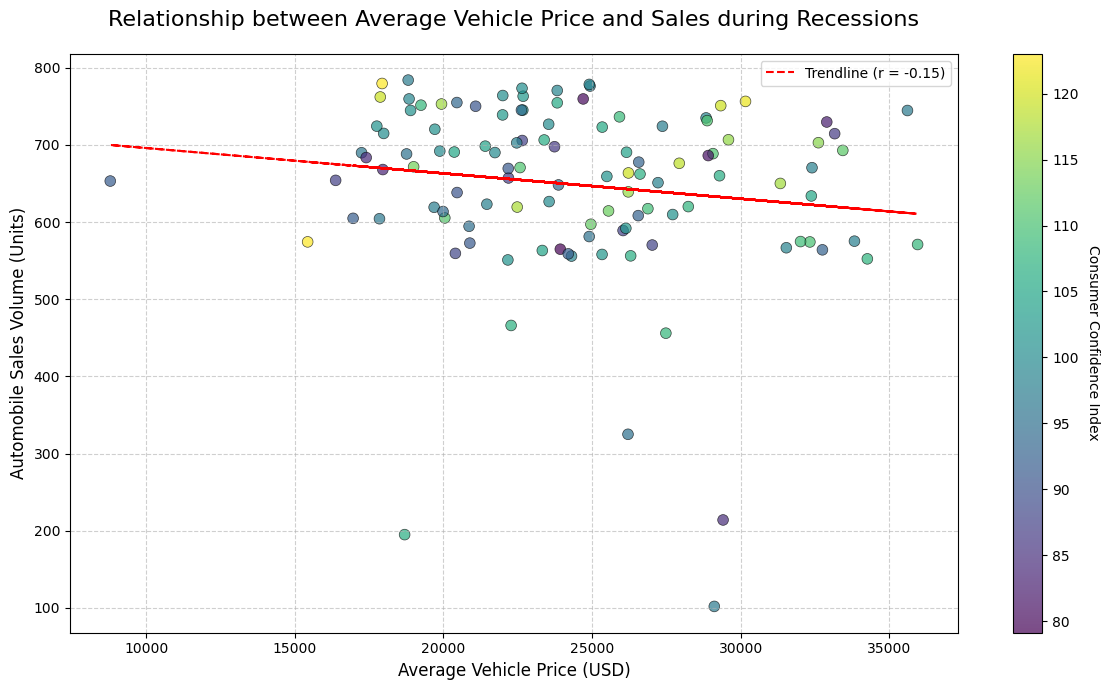

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

recession_data = df[df['Recession'] == 1]

plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=recession_data['Price'],
    y=recession_data['Automobile_Sales'],
    s=60,  # Bubble size
    c=recession_data['Consumer_Confidence'],  # Color by consumer confidence
    cmap='viridis',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.5
)

plt.title('Relationship between Average Vehicle Price and Sales during Recessions', fontsize=16, pad=20)
plt.xlabel('Average Vehicle Price (USD)', fontsize=12)
plt.ylabel('Automobile Sales Volume (Units)', fontsize=12)

cbar = plt.colorbar(scatter)
cbar.set_label('Consumer Confidence Index', rotation=270, labelpad=15)

plt.grid(True, linestyle='--', alpha=0.6)

z = np.polyfit(recession_data['Price'], recession_data['Automobile_Sales'], 1)
p = np.poly1d(z)
plt.plot(recession_data['Price'], 
         p(recession_data['Price']), 
         "r--", 
         linewidth=1.5,
         label=f'Trendline (r = {np.corrcoef(recession_data["Price"], recession_data["Automobile_Sales"])[0,1]:.2f})')

plt.legend()
plt.tight_layout()
plt.savefig('price_vs_sales_recession.png', dpi=300, bbox_inches='tight')
plt.show()

### Advertising Expenditure Distribution During Recession vs. Non-Recession Periods for XYZ Automotives

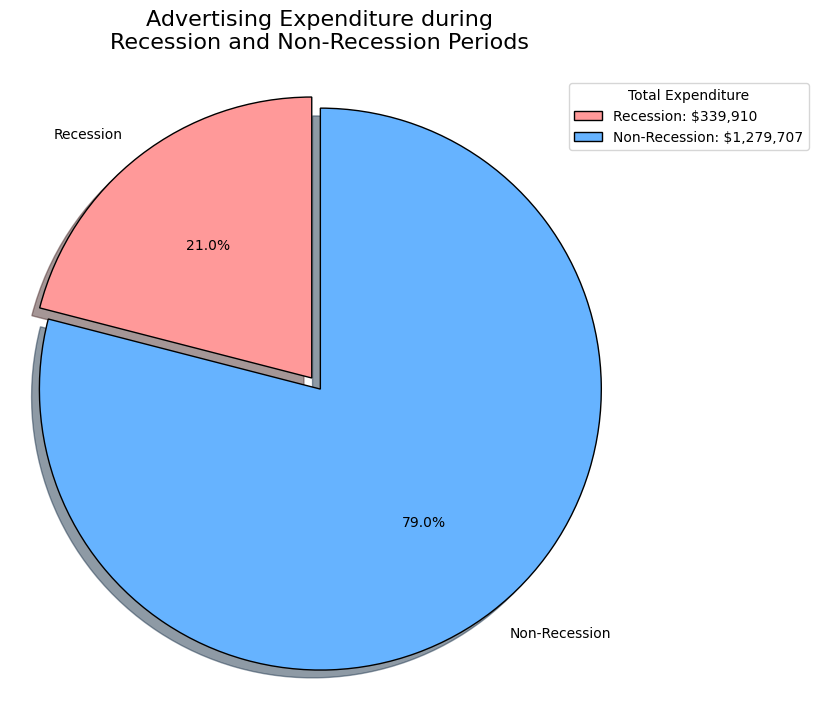

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

recession_ad = df[df['Recession'] == 1]['Advertising_Expenditure'].sum()
non_recession_ad = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

expenditure = [recession_ad, non_recession_ad]
labels = ['Recession', 'Non-Recession']
colors = ['#ff9999','#66b3ff']
explode = (0.05, 0)

plt.figure(figsize=(8, 8))
plt.pie(expenditure, 
        labels=labels, 
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Advertising Expenditure during\nRecession and Non-Recession Periods', 
          fontsize=16, pad=20)
plt.axis('equal')

legend_labels = [f'{label}: ${value:,.0f}' 
                for label, value in zip(labels, expenditure)]
plt.legend(legend_labels, 
           title="Total Expenditure",
           loc="upper right",
           bbox_to_anchor=(1.3, 1))

plt.savefig('ad_expenditure_pie.png', dpi=300, bbox_inches='tight')
plt.show()

### Pie Chart Visualization of Advertisement Expenditure by Vehicle Type During Recession Period

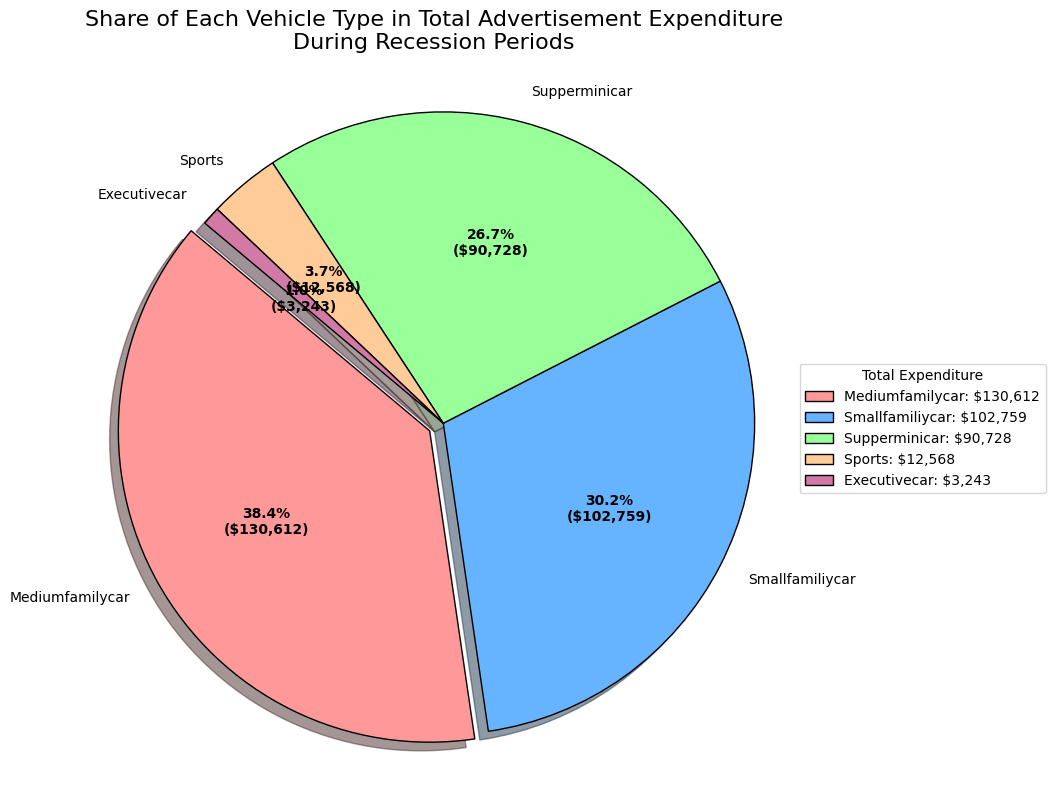

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

recession_data = df[df['Recession'] == 1]
ad_by_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().sort_values(ascending=False)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d279a6']
explode = (0.05, 0, 0, 0, 0)

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    ad_by_vehicle,
    labels=ad_by_vehicle.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n(${p*sum(ad_by_vehicle)/100:,.0f})',
    startangle=140,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.title('Share of Each Vehicle Type in Total Advertisement Expenditure\nDuring Recession Periods', 
          fontsize=16, pad=20)

plt.axis('equal')

legend_labels = [f'{label}: ${value:,.0f}' 
                for label, value in zip(ad_by_vehicle.index, ad_by_vehicle)]
plt.legend(legend_labels, 
           title="Total Expenditure",
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('ad_expenditure_by_vehicle_recession.png', dpi=300, bbox_inches='tight')
plt.show()

### Analyzing the Impact of Unemployment Rate on Vehicle Type and Sales During the Recession Period Using Line Plots

Available columns in DataFrame: ['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence', 'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition', 'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales', 'Vehicle_Type', 'City']


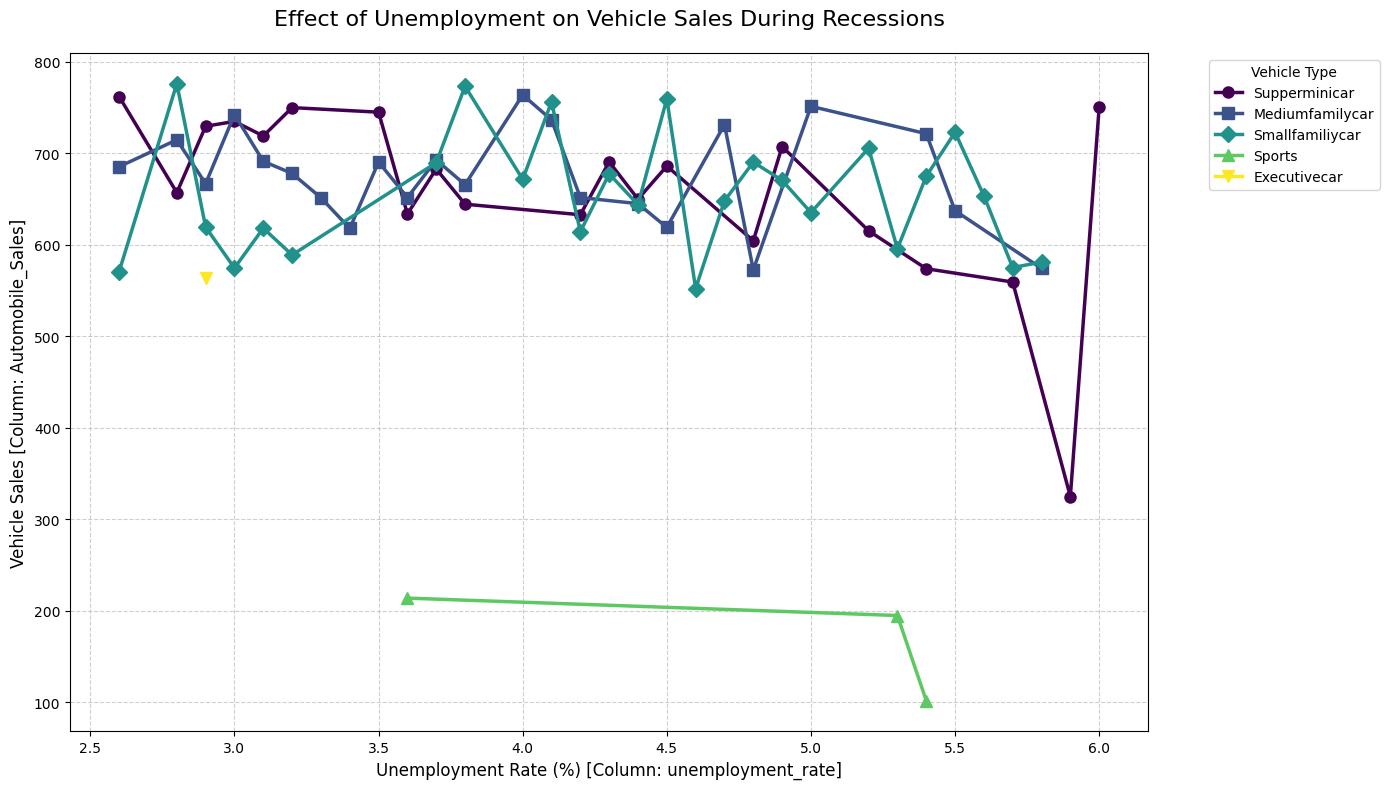

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print("Available columns in DataFrame:", df.columns.tolist())

col_names = {
    'unemployment': ['Unemployment_Rate', 'unemployment_rate', 'UnemploymentRate', 'Unemployment'],
    'sales': ['Automobile_Sales', 'Sales', 'AutomobileSales', 'Vehicle_Sales']
}

unemp_col = next((col for col in col_names['unemployment'] if col in df.columns), None)
sales_col = next((col for col in col_names['sales'] if col in df.columns), None)

if not unemp_col or not sales_col:
    raise ValueError("Required columns not found in DataFrame")

recession_data = df[df['Recession'] == 1]

vehicle_types = recession_data['Vehicle_Type'].unique()

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(vehicle_types)))
markers = ['o', 's', 'D', '^', 'v', 'p', '*']

for i, vehicle in enumerate(vehicle_types):
    vehicle_data = recession_data[recession_data['Vehicle_Type'] == vehicle]
    
    if not vehicle_data.empty:
        grouped = vehicle_data.groupby(unemp_col)[sales_col].mean().reset_index()
        grouped = grouped.sort_values(unemp_col)
        
        plt.plot(grouped[unemp_col], 
                 grouped[sales_col],
                 label=vehicle,
                 color=colors[i],
                 marker=markers[i % len(markers)],
                 markersize=8,
                 linewidth=2.5)

plt.title('Effect of Unemployment on Vehicle Sales During Recessions', fontsize=16, pad=20)
plt.xlabel(f'Unemployment Rate (%) [Column: {unemp_col}]', fontsize=12)
plt.ylabel(f'Vehicle Sales [Column: {sales_col}]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('unemployment_effect_on_sales.png', dpi=300, bbox_inches='tight')
plt.show()

### Mapping the Highest Sales Regions/Offices During the Recession Period

In [34]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

### Analyzing the Impact of Recession on Office/City Sales Through a Choropleth Visualization

In [35]:
print("Available columns:", df.columns.tolist())

location_cols = ['Region', 'Office', 'City', 'State', 'Latitude', 'Longitude']
existing_loc_cols = [col for col in location_cols if col in df.columns]

if not existing_loc_cols:
    print("\nNo geographical data found in the dataset. Alternative visualization will be created.")
else:
    print("\nAvailable location columns:", existing_loc_cols)

Available columns: ['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence', 'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition', 'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales', 'Vehicle_Type', 'City']

Available location columns: ['City']


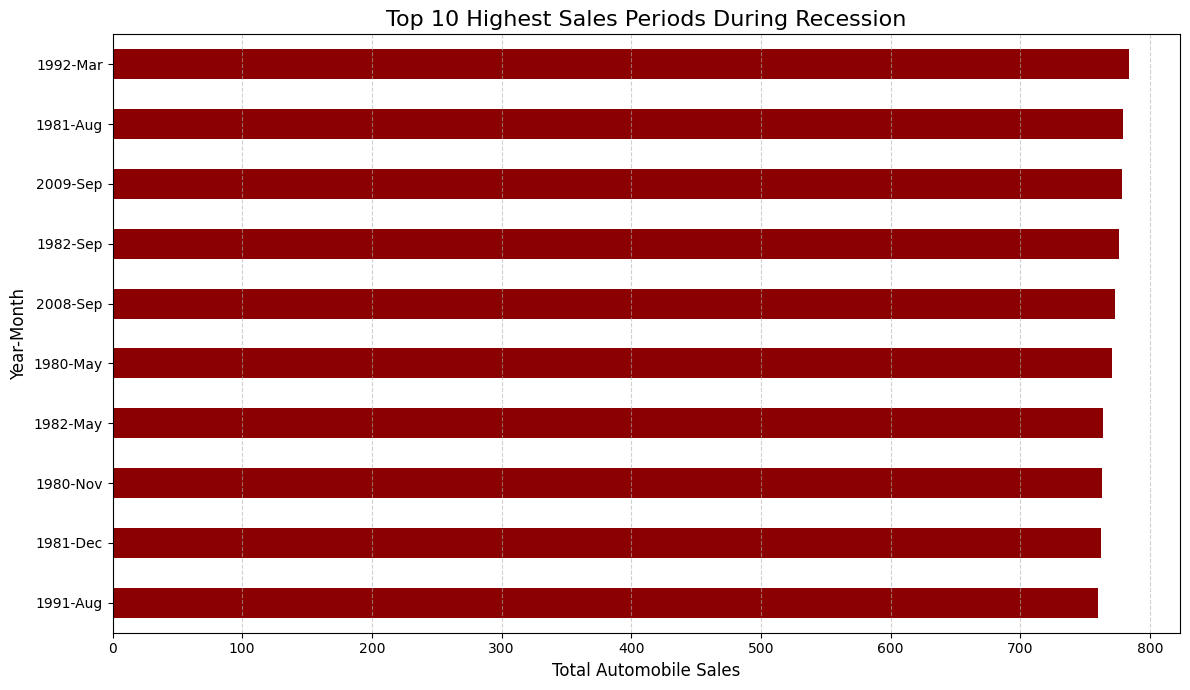

In [38]:
plt.figure(figsize=(12, 7))

top_periods = (df[df['Recession'] == 1]
               .groupby(['Year', 'Month'])['Automobile_Sales']
               .sum()
               .nlargest(10)
               .sort_values())

top_periods.index = top_periods.index.map(lambda x: (x[0], f"{int(x[1]):02d}" if str(x[1]).isdigit() else str(x[1])))

top_periods.plot(kind='barh', color='darkred')
plt.title('Top 10 Highest Sales Periods During Recession', fontsize=16)
plt.xlabel('Total Automobile Sales', fontsize=12)
plt.ylabel('Year-Month', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

labels = [f"{year}-{month}" for year, month in top_periods.index]
plt.yticks(range(len(top_periods)), labels)

plt.tight_layout()
plt.savefig('top_sales_periods_recession.png', dpi=300, bbox_inches='tight')
plt.show()

### Conclusion: Key Learnings and Insights Gained from Automobile Sales Analysis During Recessions

**Technical Skills**:
Mastered Python data visualization with Matplotlib
Learned to clean and analyze real-world sales data
Solved common coding errors and data issues

**Business Insights**:
Luxury vehicles show recession resilience
Family cars are most vulnerable to economic downturns
Unemployment and consumer confidence significantly impact sales

**Problem-Solving**:
Adapted techniques when facing data limitations
Created alternative visualizations when ideal methods weren't available
Developed clear visual storytelling with data